In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [36]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [37]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [38]:
df[['Region']]=df[['Region']].astype(int)

In [39]:
df = df.dropna().reset_index(drop=True)

In [40]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [41]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [42]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [44]:
columns_to_convert = ['month','day','year','Temperature','RH','Ws']

for col in columns_to_convert:
    # Convert column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# After coercing errors, drop rows where these critical columns have NaN.
# This removes any rows that contained non-numeric values like 'month'.
df.dropna(subset=columns_to_convert, inplace=True)

# Now, convert the columns to integer type.
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [46]:
objects = [featues for featues in df.columns if df[featues].dtype == 'O']
for i in objects:
  if i != 'Classes':
    df[i]=df[i].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [48]:
df.to_csv('Algerian_forest_fires_cleaned.csv',index=False)

In [49]:
df_copy=df.drop(['day','month','year'],axis=1)

In [50]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [51]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [52]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [53]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

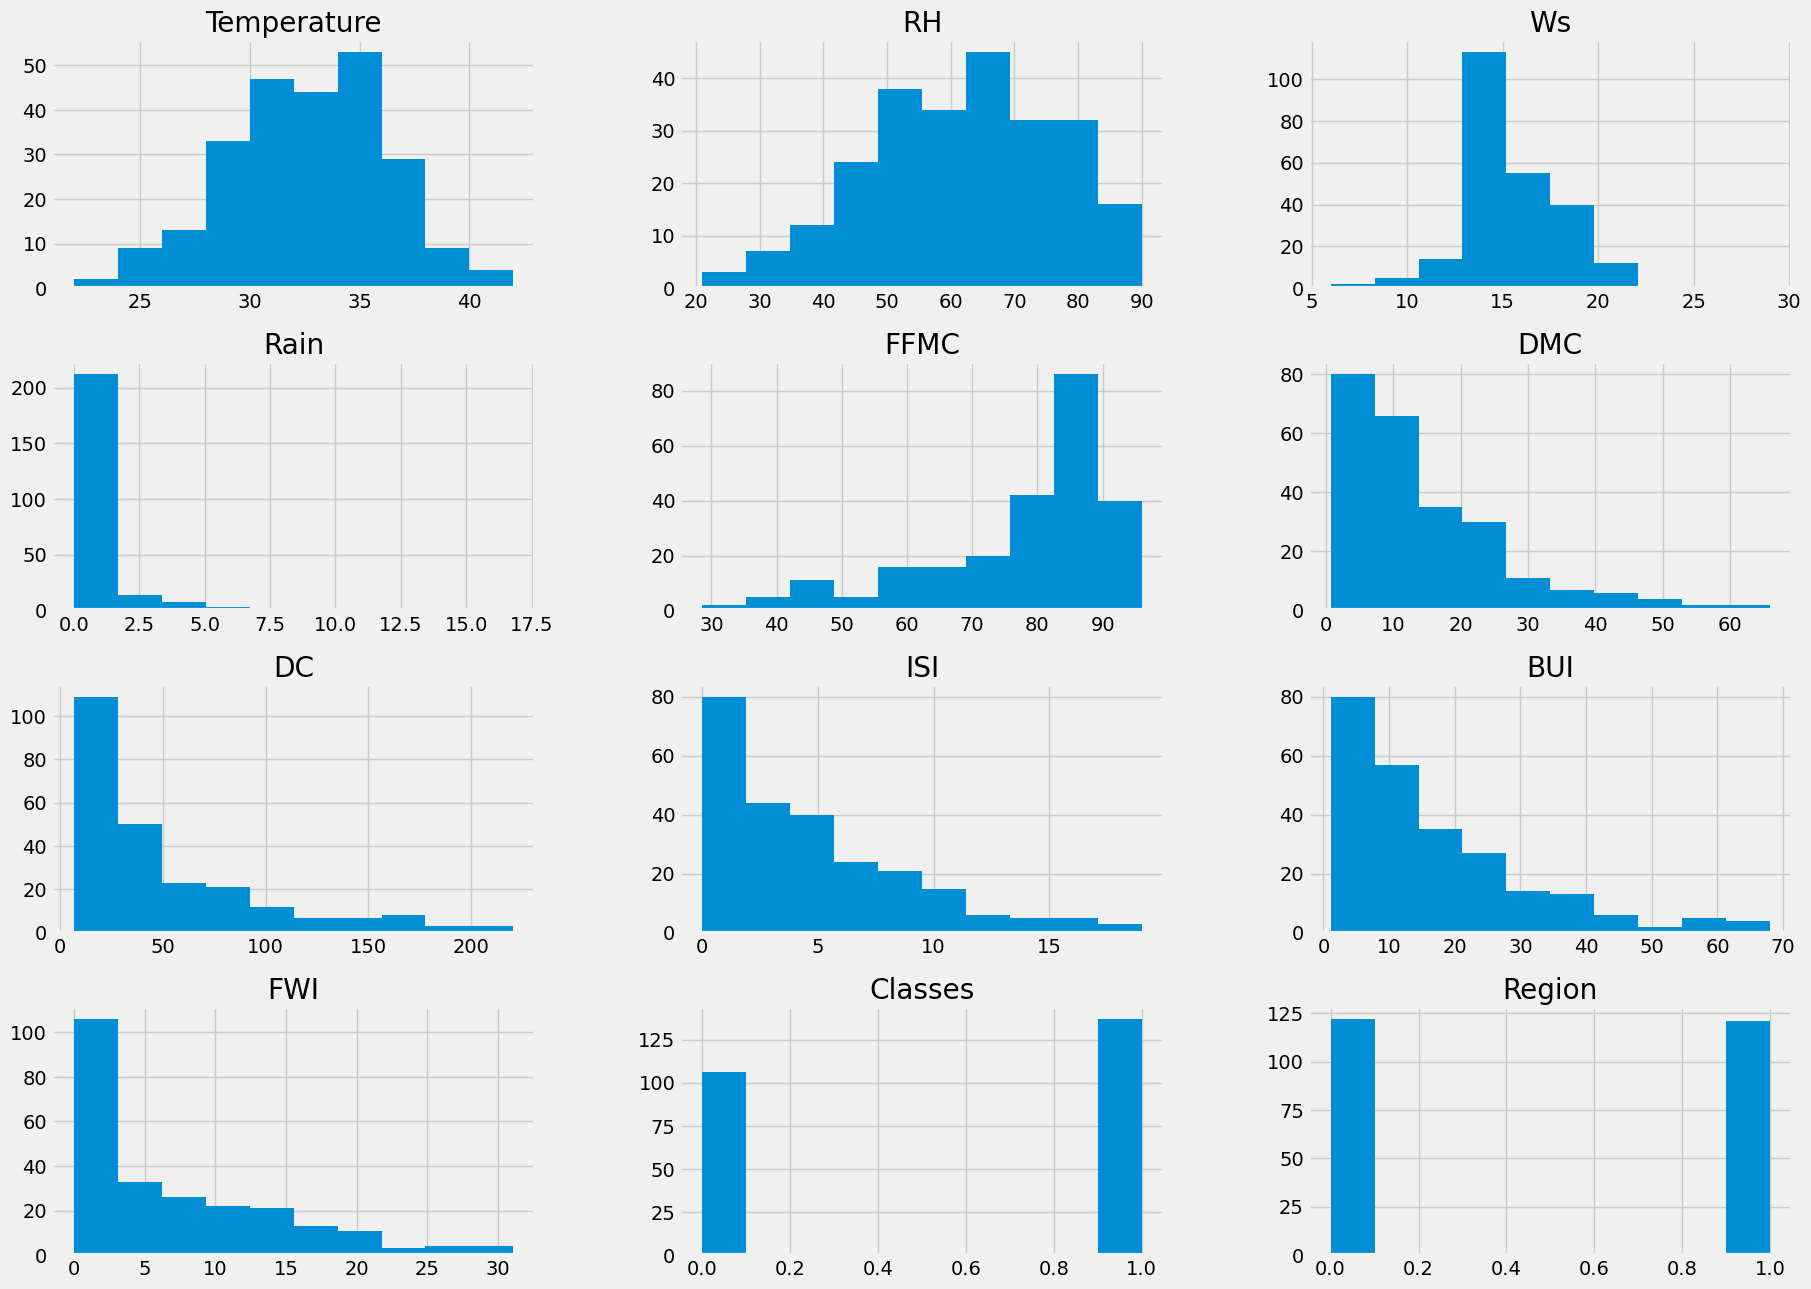

In [54]:
plt.style.use('fivethirtyeight')
df_copy.hist(figsize=(20,15))
plt.show()

([<matplotlib.patches.Wedge at 0x1ba15638670>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'not fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.38%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.62%')])

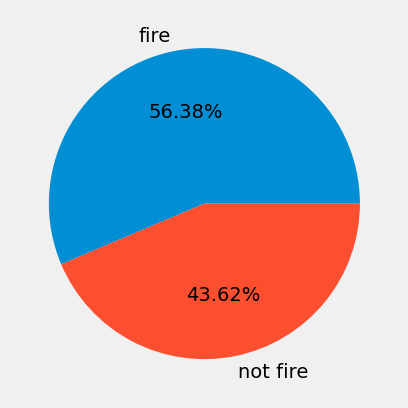

In [55]:
plt.pie(df_copy['Classes'].value_counts(),labels=['fire','not fire'],autopct='%1.2f%%')

<Axes: ylabel='FWI'>

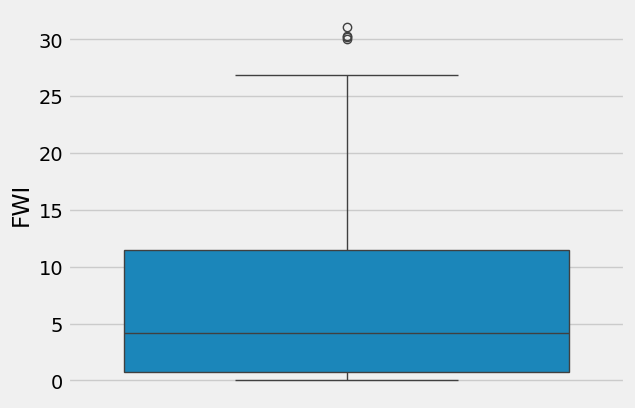

In [56]:
sns.boxplot(df_copy['FWI'])

<Axes: >

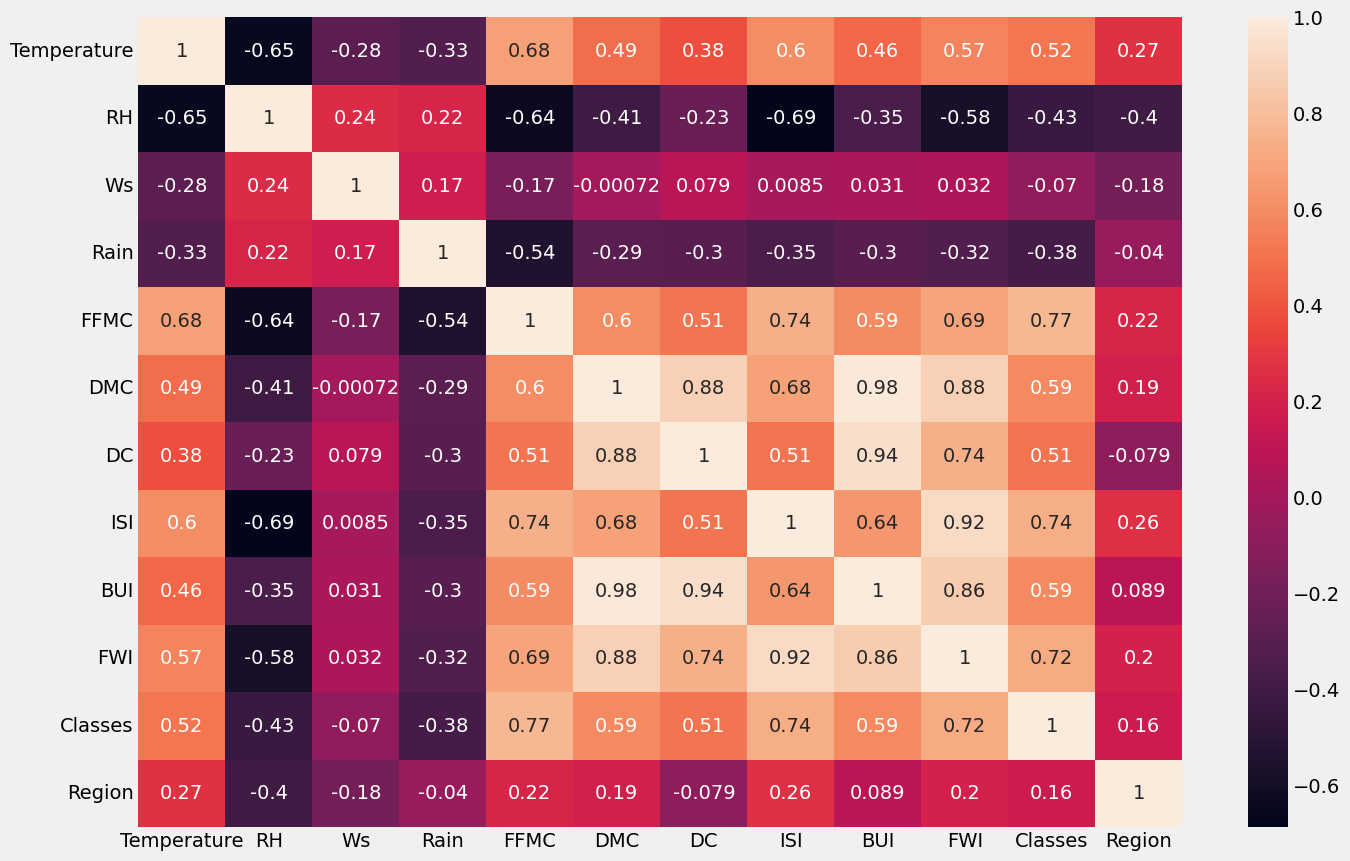

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True)

## Model Training

In [58]:
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [59]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [60]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [61]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [62]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [63]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [66]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [67]:
# Check for multicollinearity


In [68]:
X_train.drop('BUI',axis=1,inplace=True)
X_test.drop('BUI',axis=1,inplace=True)

In [69]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [70]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.188837,1.000000


In [71]:
def remove_correlated_columns(df, threshold=0.85):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    df_cleaned = df.drop(columns=to_drop)
    return df_cleaned, to_drop


In [72]:
X_train, dropped_cols_train = remove_correlated_columns(X_train, threshold=0.85)
X_test, dropped_cols_test = remove_correlated_columns(X_test, threshold=0.85)

print(f"Columns dropped from X_train: {dropped_cols_train}")
print(f"Columns dropped from X_test: {dropped_cols_test}")

Columns dropped from X_train: ['DC']
Columns dropped from X_test: ['DC']


In [73]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [74]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.617273,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.188837,1.000000


In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print('X_train_scaled head:')
print(X_train_scaled_df.head())
print('\nX_test_scaled head:')
print(X_test_scaled_df.head())

X_train_scaled head:
   Temperature        RH        Ws      Rain      FFMC       DMC       ISI  \
0    -0.842842  0.783080  1.299720 -0.337274 -0.128056 -0.882729 -0.629633   
1    -0.301758  0.649508 -0.598748 -0.290487 -1.217586 -0.866876 -0.930585   
2     2.133120 -2.088702 -0.219054 -0.384060  1.157031  0.615402  2.727139   
3    -0.031216 -0.151919  0.920027 -0.243701 -0.037262 -0.272379 -0.606483   
4    -0.031216 -1.020132 -0.598748 -0.056555 -0.009325 -0.605297 -0.699084   

    Classes    Region  
0 -1.104315 -0.989071  
1 -1.104315  1.011050  
2  0.905539  1.011050  
3 -1.104315 -0.989071  
4 -1.104315 -0.989071  

X_test_scaled head:
   Temperature        RH        Ws      Rain      FFMC       DMC       ISI  \
0    -0.301758  0.115224 -0.219054 -0.384060  0.633218 -0.042508  0.203772   
1     0.239326 -0.552633 -0.978441 -0.384060  0.737981 -0.383352  0.365823   
2    -1.113385 -0.285490  0.920027  0.645242 -0.973140 -0.914435 -0.837985   
3     0.509868 -0.285490 -0.97844

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_pred = lin_reg.predict(X_test_scaled)

Mean Squared Error: 0.67
R-squared: 0.9847657384266951


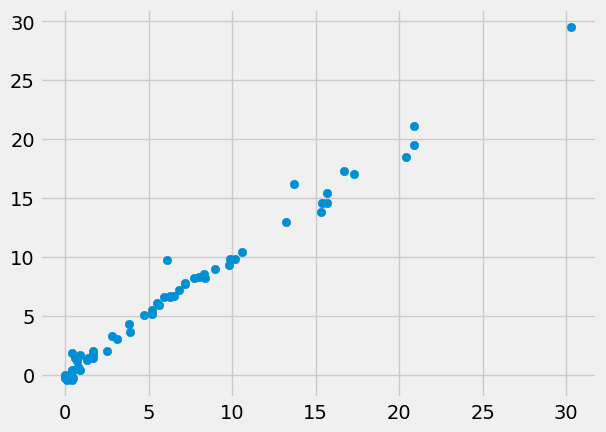

In [79]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred)

In [80]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error

In [81]:
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_reg.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_mae= mean_absolute_error(y_test,lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
print(lasso_mae, np.sqrt(lasso_mse), lasso_r2)

1.133175994914409 1.4994485292591664 0.9492020263112388


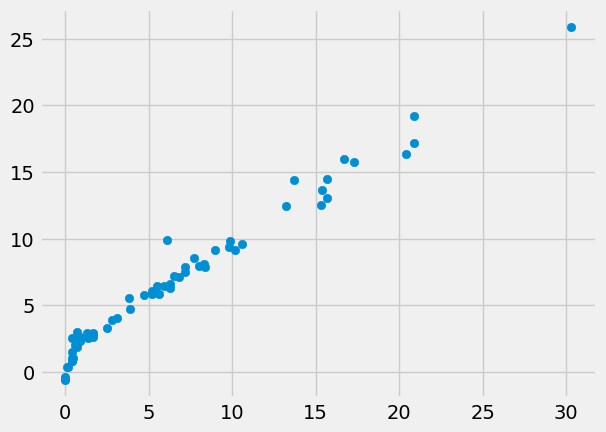

In [82]:
plt.scatter(y_test, lasso_y_pred)

In [83]:
from sklearn.linear_model import LassoCV

In [84]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [85]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [86]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [87]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

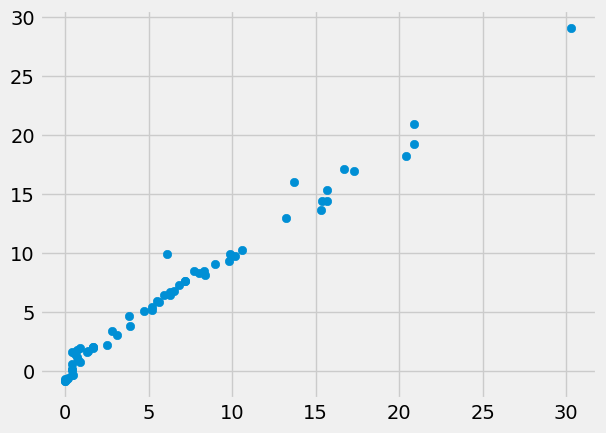

In [88]:
y_pred_lassocv=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred_lassocv)

In [89]:
score_lassocv = r2_score(y_test, y_pred_lassocv)
print(score_lassocv)

0.9820946715928275


## Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [91]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
ridge_y_pred=ridge.predict(X_test_scaled)
ridge_mse=mean_squared_error(y_test,ridge_y_pred)
ridge_mae=mean_absolute_error(y_test,ridge_y_pred)
ridge_r2=r2_score(y_test,ridge_y_pred)
print(ridge_mae,np.sqrt(ridge_mse),ridge_r2)

0.5642305340105715 0.8336185529456561 0.9842993364555512


In [92]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
ridgecv_y_pred=ridgecv.predict(X_test_scaled)
ridgecv_mse=mean_squared_error(y_test,ridgecv_y_pred)
ridgecv_r2=r2_score(y_test,ridgecv_y_pred)
print(np.sqrt(ridgecv_mse),ridgecv_r2)

0.8336185529456561 0.9842993364555512


In [93]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [94]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [95]:
import joblib

In [96]:
joblib.dump(scaler,'scaler.pkl')
joblib.dump(ridge,'ridge_model.pkl')

['ridge_model.pkl']

In [97]:
model = joblib.load('ridge_model.pkl')